## Final Project Submission

* Student name: Hoang Nguyen, Madoria Thomas, Marcelo Scatena
* Student pace: full time
* Scheduled project review date: 07/01/2021
* Instructor name: Skyler English


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification


In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Split Data into Test and Train

In [4]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [5]:
# We'll use df as our train dataset
y = y_train
X_train['price'] = y
df = X_train

C:\Users\01aut\AppData\Local\Temp/ipykernel_1692/3218614198.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['price'] = y


### Find out where my missing values and fill them to make a first model with all the information we can:

In [6]:
df.isnull().sum()

id                  0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1897
view               53
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3059
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
price               0
dtype: int64

In [7]:
df['view'].value_counts()

NONE         15556
AVERAGE        753
GOOD           395
EXCELLENT      263
FAIR           257
Name: view, dtype: int64

In [8]:
df['view'].fillna('NONE', inplace=True)

C:\Users\01aut\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [9]:
df['waterfront'].value_counts()

NO     15262
YES      118
Name: waterfront, dtype: int64

In [10]:
df['waterfront'].fillna('NO', inplace=True)

In [11]:
df['yr_renovated'].value_counts() 

0.0       13625
2014.0       56
2005.0       27
2003.0       24
2007.0       24
          ...  
1954.0        1
1959.0        1
1944.0        1
1951.0        1
1978.0        1
Name: yr_renovated, Length: 68, dtype: int64

In [12]:
df['yr_renovated'].fillna(0.0, inplace=True)

### Change all our objects into numeric values:

In [13]:
# Convert grade to int
df['grade'] = df['grade'].apply(lambda x: x[:2] if x[0]=='1' else x[:1]).astype('int64')

C:\Users\01aut\AppData\Local\Temp/ipykernel_1692/559690772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade'] = df['grade'].apply(lambda x: x[:2] if x[0]=='1' else x[:1]).astype('int64')


In [14]:
# Remove ? and convert sqft_basement to int
df['sqft_basement'] = df['sqft_basement'].apply(lambda x: 0 if x=='?' else int(x.split('.')[0]))

C:\Users\01aut\AppData\Local\Temp/ipykernel_1692/31411883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sqft_basement'] = df['sqft_basement'].apply(lambda x: 0 if x=='?' else int(x.split('.')[0]))


In [15]:
# Change waterfront to numeric
df['waterfront'] = df['waterfront'].apply(lambda x: 1 if x=='YES' else 0)

C:\Users\01aut\AppData\Local\Temp/ipykernel_1692/552228054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['waterfront'] = df['waterfront'].apply(lambda x: 1 if x=='YES' else 0)


In [16]:
df['view'].unique()

array(['NONE', 'AVERAGE', 'GOOD', 'EXCELLENT', 'FAIR'], dtype=object)

In [17]:
# Change view to numeric
df['view'] = df['view'].apply(lambda x: 0 if x=='NONE' else (1 if x=='FAIR' else (2 if x=='AVERAGE' else (3 if x=='GOOD' else 4))))

C:\Users\01aut\AppData\Local\Temp/ipykernel_1692/20001696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['view'] = df['view'].apply(lambda x: 0 if x=='NONE' else (1 if x=='FAIR' else (2 if x=='AVERAGE' else (3 if x=='GOOD' else 4))))


In [18]:
df['condition'].unique()

array(['Good', 'Average', 'Very Good', 'Fair', 'Poor'], dtype=object)

In [19]:
# Change condition to numeric
df['condition'] = df['condition'].apply(lambda x: 1 if x=='Poor' else (2 if x=='Fair' else (3 if x=='Average' else (4 if x=='Good' else 5))))

C:\Users\01aut\AppData\Local\Temp/ipykernel_1692/3646484592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condition'] = df['condition'].apply(lambda x: 1 if x=='Poor' else (2 if x=='Fair' else (3 if x=='Average' else (4 if x=='Good' else 5))))


In [20]:
#Convert date column to 2 separate columns for month and year
date = df['date'].str.split('/', expand=True)
df['month_sold'] = date[0].astype('int64')
df['year_sold'] = date[2].astype('int64')

#Drop original date column
df.drop(columns=['date'], axis=1, inplace=True)

C:\Users\01aut\AppData\Local\Temp/ipykernel_1692/2310225090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_sold'] = date[0].astype('int64')
C:\Users\01aut\AppData\Local\Temp/ipykernel_1692/2310225090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_sold'] = date[2].astype('int64')
C:\Users\01aut\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

In [21]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,month_sold,year_sold
6243,9834201100,4,2.00,1440,4855,2.0,0,0,4,7,...,1972,0.0,98144,47.5717,-122.287,1300,4080,332500.0,12,2014
8986,7795810110,3,1.75,1430,9857,1.0,0,2,4,7,...,1980,0.0,98045,47.4964,-121.771,1310,9880,390000.0,5,2015
9419,1853081250,4,2.75,3120,5000,2.0,0,0,3,9,...,2010,0.0,98074,47.5940,-122.062,3200,5000,800000.0,12,2014
10155,2558630350,4,2.50,2060,6958,1.0,0,0,3,7,...,1974,0.0,98034,47.7251,-122.168,1760,7350,462000.0,3,2015
10436,3362401000,3,2.00,2500,4080,1.5,0,0,5,7,...,1922,0.0,98103,47.6813,-122.346,1550,3060,695000.0,7,2014


C:\Users\01aut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


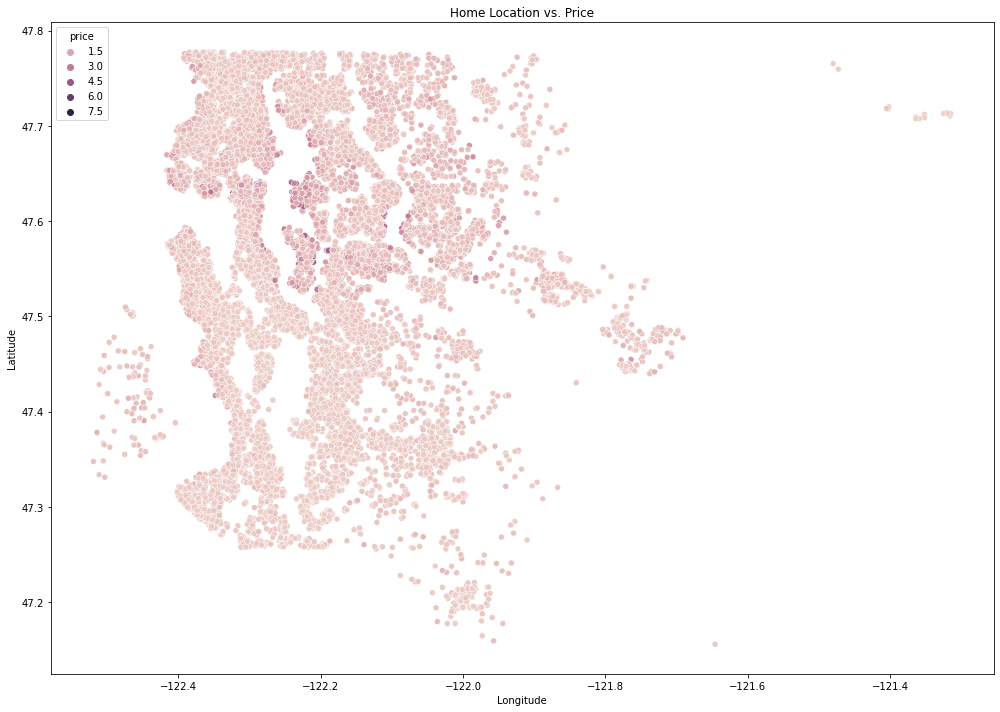

In [22]:
plt.figure(figsize=(14, 10))
plt.title('Home Location vs. Price')
sns.scatterplot(df['long'], df['lat'], hue=df['price'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.legend()
plt.tight_layout()

# Model 1 - Using All Features

In [23]:
df['total_area'] = df['sqft_living']+df['sqft_lot']

C:\Users\01aut\AppData\Local\Temp/ipykernel_1692/2239908693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_area'] = df['sqft_living']+df['sqft_lot']


In [26]:
df.drop(['sqft_living', 'sqft_lot'], axis=1, inplace=True)

In [27]:
X = df.drop('total_area', axis=1)
y = df['total_area']
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

C:\Users\01aut\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_area   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     930.4
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        08:43:32   Log-Likelihood:            -2.0143e+05
No. Observations:               17277   AIC:                         4.029e+05
Df Residuals:                   17256   BIC:                         4.031e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.297e+06   1.55e+06      1.481      0.139   -7.43e+05    5.34e+06
id              -5.6e-07   7.49e-08     -7.479      0.000   -7.07e-07   -4.13e-07
bedrooms       -920.9772    309.217     -2.978      0.003   -1527.075    -314.880
bathrooms       151.9868    510.410      0.298      0.766    -848.469    1152.442
floors        -1798.4556    559.031     -3.217      0.001   -2894.214    -702.698
waterfront    -7510.4837   2883.231     -2.605      0.009   -1.32e+04   -1859.059
view           1402.3435    335.095      4.185      0.000     745.524    2059.163
condition      -899.4785    367.004     -2.451      0.014   -1618.843    -180.114
grade           766.9111    352.234      2.177      0.029      76.497    1457.325
sqft_above        5.8938      0.605      9.738      0.000       4.707       7.080
sqft_basement     3.0810      0.700      4.403      0.000       1.709       4.452
yr_built        -51.5309     11.551     -4.461      0.000     -74.173     -28.889
yr_renovated     -1.0344      0.621     -1.666      0.096      -2.251       0.182
zipcode           3.5059      5.168      0.678      0.498      -6.625      13.636
lat           -8538.6240   1787.451     -4.777      0.000    -1.2e+04   -5035.039
long           1.963e+04   2042.955      9.607      0.000    1.56e+04    2.36e+04
sqft_living15    -4.6982      0.540     -8.701      0.000      -5.757      -3.640
sqft_lot15        1.0072      0.008    118.848      0.000       0.991       1.024
price             0.0017      0.001      1.612      0.107      -0.000       0.004
month_sold      -49.0736    109.947     -0.446      0.655    -264.581     166.434
year_sold       135.0772    734.873      0.184      0.854   -1305.348    1575.502
==============================================================================
Omnibus:                    36307.650   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        262121357.283
Skew:                          17.972   Prob(JB):                         0.00
Kurtosis:                     605.353   Cond. No.                     3.94e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The first model has an adjusted r-squared of 0.703, with a few insignificant values (P-Values > 0.05).

## Normality

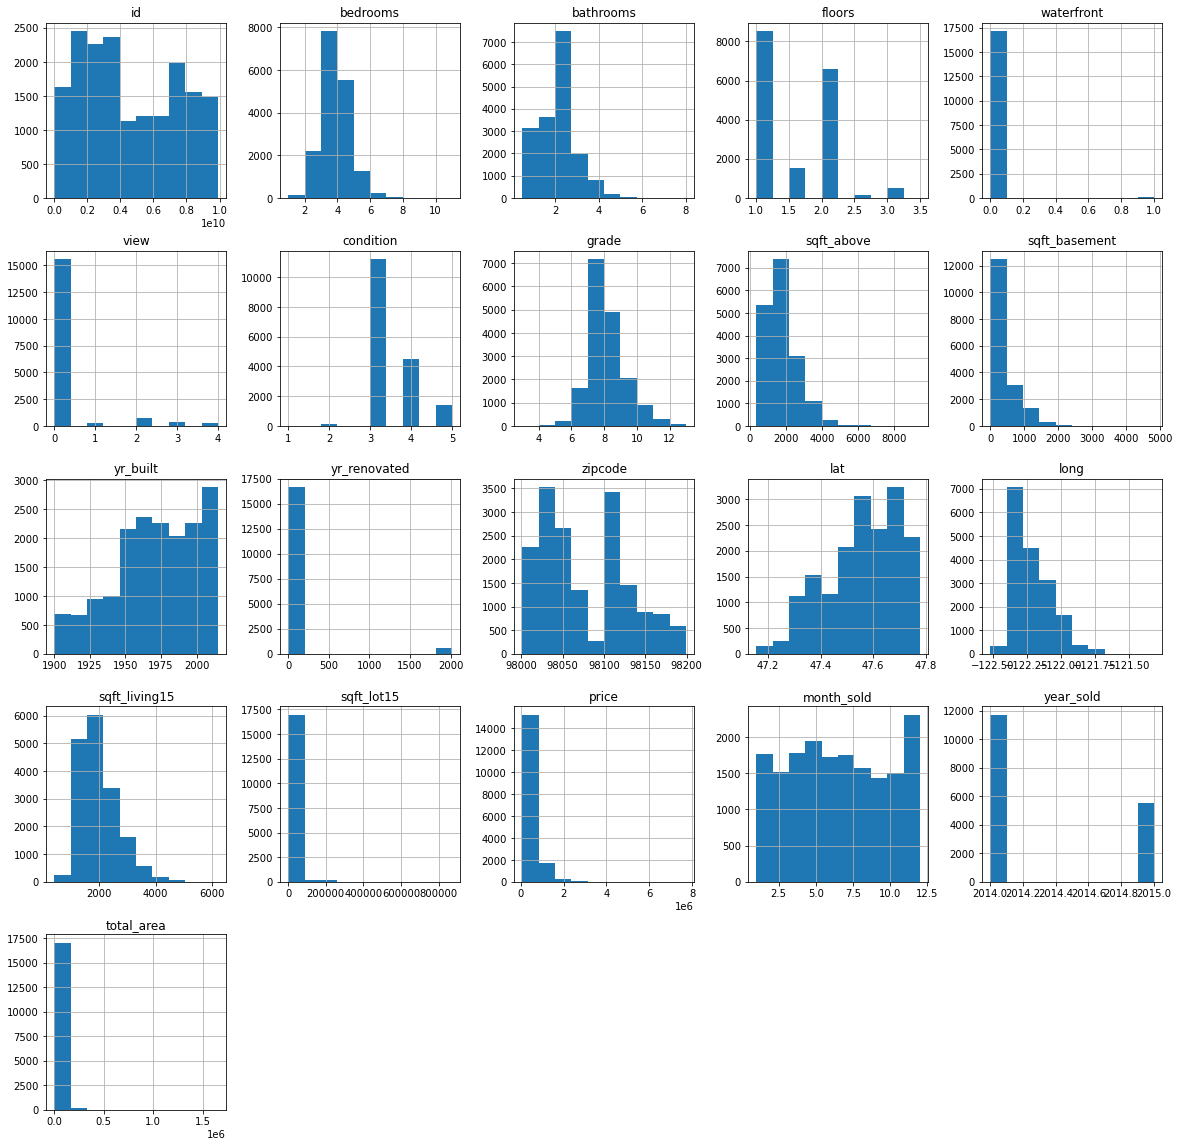

In [28]:
df.hist(figsize=(20,20));

None of these variables seem to follow a normal distribution. While this may create problems satisfying all assumptions, we'll first take a look at the other assumptions to see if there are any obvious changes to me made.

For now we'll use a QQ Plot to confirm that our assesment is correct.

C:\Users\01aut\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 864x576 with 0 Axes>

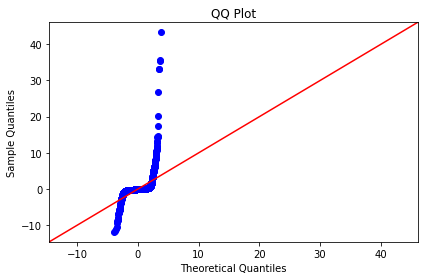

In [29]:
plt.figure(figsize=(12, 8))
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.tight_layout();

## The next step we'll implement changes regarding our business question

In [30]:
df['bedrooms'].value_counts()

3     7836
4     5542
2     2189
5     1281
6      216
1      161
7       35
8       10
9        4
10       2
11       1
Name: bedrooms, dtype: int64

In [27]:
# Remove the few houses with high number of bedrooms
df = df[~df['bedrooms'].isin([11, 10, 9])]

In [28]:
# Removing features not pertinent to our business question or with too many unknown values
# df.drop(['id', 'year_sold', 'month_sold', 'yr_renovated', 'view', 'waterfront'], axis=1, inplace=True)

#### Turn Bathrooms column into wc_comp and wc_inc:

In [31]:
df['bathrooms'].value_counts()

2.50    4322
1.00    3076
1.75    2446
2.25    1646
2.00    1527
1.50    1168
2.75     933
3.00     596
3.50     583
3.25     465
3.75     120
4.00     111
4.50      84
4.25      66
0.75      59
4.75      20
5.00      17
5.25      10
1.25       5
5.50       5
0.50       4
5.75       3
6.00       3
6.50       2
8.00       2
6.75       2
6.25       1
7.75       1
Name: bathrooms, dtype: int64

In [32]:
df['bathrooms'] = df['bathrooms'].apply(lambda x: np.ceil(x) if str(x)[2] == '7' else (np.ceil(x) if str(x)[2] == '5' else np.floor(x)))

In [33]:
df['bathrooms'].value_counts()

2.0    6787
3.0    6316
1.0    3144
4.0     880
5.0     131
6.0      12
7.0       4
8.0       3
Name: bathrooms, dtype: int64

In [34]:
df = df[~df['bathrooms'].isin([8.0, 7.0])]

#### Changed Floor column:

In [35]:
df['floors'].value_counts()

1.0    8531
2.0    6576
1.5    1532
3.0     498
2.5     126
3.5       7
Name: floors, dtype: int64

In [34]:
df['floors'] = df['floors'].apply(lambda x: np.ceil(x))

# Model 2 - Changing price target and removing features

In [37]:
X = df.drop('total_area', axis=1)
y = df['total_area']
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

C:\Users\01aut\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_area   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     924.3
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        08:44:37   Log-Likelihood:            -2.0135e+05
No. Observations:               17270   AIC:                         4.027e+05
Df Residuals:                   17249   BIC:                         4.029e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.277e+06   1.55e+06      1.468      0.142   -7.64e+05    5.32e+06
id            -5.563e-07   7.49e-08     -7.428      0.000   -7.03e-07    -4.1e-07
bedrooms       -849.2599    308.390     -2.754      0.006   -1453.736    -244.784
bathrooms      -305.6395    429.709     -0.711      0.477   -1147.912     536.633
floors        -1697.4669    559.131     -3.036      0.002   -2793.421    -601.513
waterfront    -7738.9930   2897.394     -2.671      0.008   -1.34e+04   -2059.807
view           1384.7407    335.371      4.129      0.000     727.379    2042.103
condition      -898.6074    367.059     -2.448      0.014   -1618.081    -179.134
grade           727.8145    354.505      2.053      0.040      32.949    1422.680
sqft_above        5.9775      0.606      9.860      0.000       4.789       7.166
sqft_basement     3.2463      0.692      4.694      0.000       1.891       4.602
yr_built        -46.2993     11.551     -4.008      0.000     -68.941     -23.658
yr_renovated     -0.9380      0.620     -1.512      0.130      -2.154       0.278
zipcode           3.7550      5.169      0.727      0.468      -6.376      13.886
lat           -8887.1736   1793.836     -4.954      0.000   -1.24e+04   -5371.072
long           1.967e+04   2043.065      9.628      0.000    1.57e+04    2.37e+04
sqft_living15    -4.7238      0.543     -8.692      0.000      -5.789      -3.659
sqft_lot15        1.0062      0.008    118.585      0.000       0.990       1.023
price             0.0023      0.001      2.132      0.033       0.000       0.004
month_sold      -44.7217    109.962     -0.407      0.684    -260.258     170.815
year_sold       138.8833    735.014      0.189      0.850   -1301.820    1579.586
==============================================================================
Omnibus:                    36312.445   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        262663307.264
Skew:                          17.994   Prob(JB):                         0.00
Kurtosis:                     606.097   Cond. No.                     3.94e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Variable Correlations

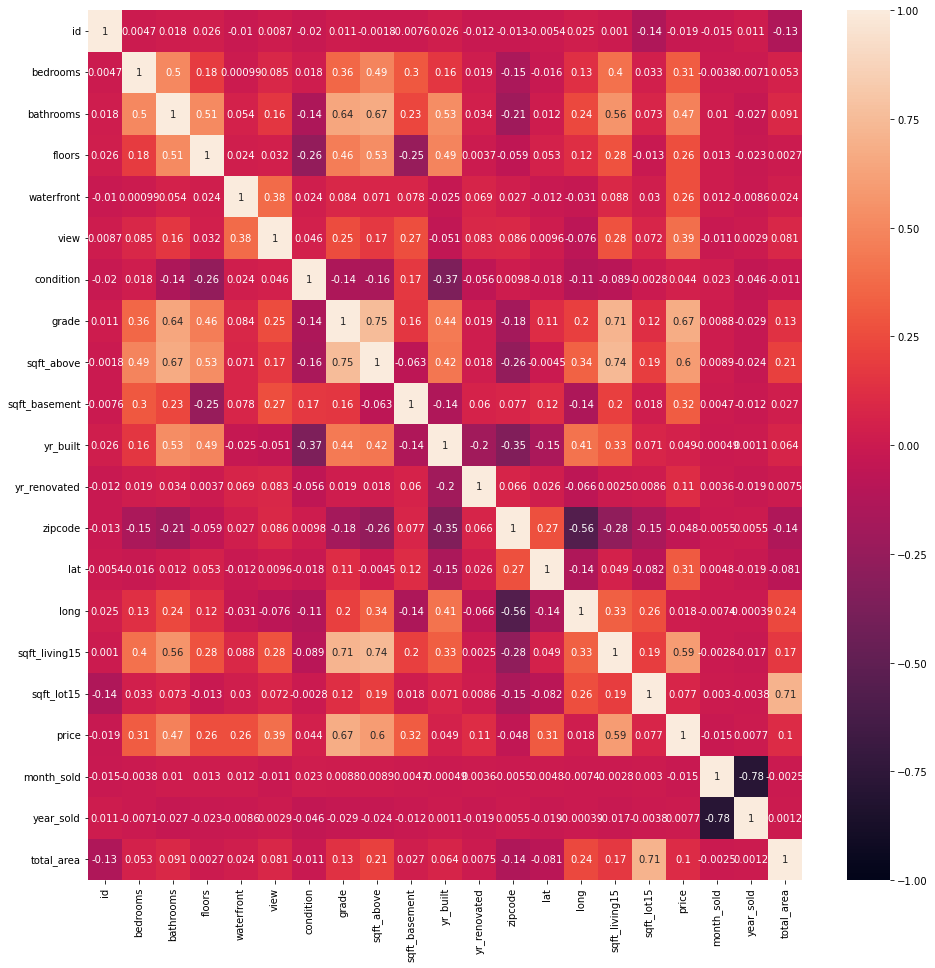

In [38]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True);

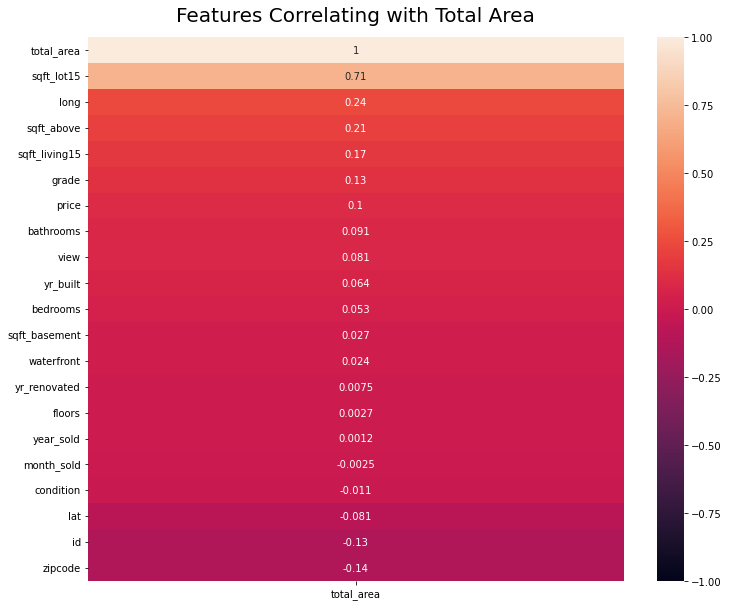

In [39]:
fig, ax = plt.subplots(figsize=(12, 10))
heatmap = sns.heatmap(df.corr()[['total_area']].sort_values(by='total_area', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Total Area', fontdict={'fontsize':20}, pad=16);

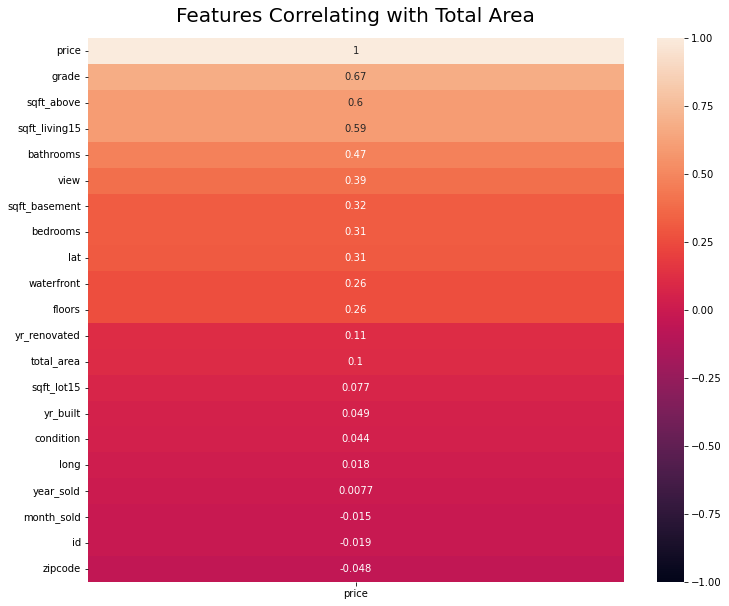

In [40]:
fig, ax = plt.subplots(figsize=(12, 10))
heatmap = sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':20}, pad=16);

Of the features most correlated with Price, a few of them are regarding to the size of the property and surrounding ones (sqft_living, sqft_living15, sqft_above, number of bathrooms)

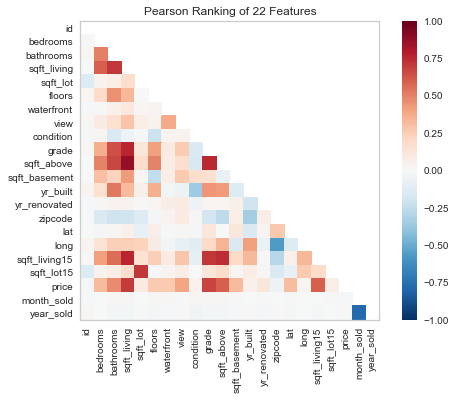

In [38]:
visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(df)
visualizer.show();

In [39]:
# Drop some highly correlated columns
df.drop(['grade', 'sqft_above', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

In [40]:
# Drop uncorrelated columns
df.drop(['id', 'year_sold', 'month_sold', 'zipcode'], axis=1, inplace=True)

# Model 3 - Addressing multicolinearity and dropping insignificant values

In [41]:
X = df.drop('price', axis=1)
y = df['price']
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2518.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:05:31   Log-Likelihood:            -2.3617e+05
No. Observations:               17263   AIC:                         4.724e+05
Df Residuals:                   17249   BIC:                         4.725e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.811e+07   1.77e+06    -27.122      0.000   -5.16e+07   -4.46e+07
bedrooms      -4.659e+04   2312.629    -20.147      0.000   -5.11e+04   -4.21e+04
bathrooms      2.184e+04   3228.232      6.764      0.000    1.55e+04    2.82e+04
sqft_living     295.2460      3.184     92.739      0.000     289.006     301.486
sqft_lot         -0.1144      0.042     -2.714      0.007      -0.197      -0.032
floors         1.987e+04   3646.236      5.451      0.000    1.27e+04     2.7e+04
waterfront     5.754e+05   2.13e+04     27.039      0.000    5.34e+05    6.17e+05
view           6.594e+04   2437.126     27.055      0.000    6.12e+04    7.07e+04
condition      3.585e+04   2737.031     13.099      0.000    3.05e+04    4.12e+04
sqft_basement   -65.2062      4.915    -13.268      0.000     -74.839     -55.573
yr_built      -1385.1407     80.045    -17.304      0.000   -1542.038   -1228.244
yr_renovated     30.4679      4.671      6.523      0.000      21.312      39.624
lat            6.535e+05   1.21e+04     53.900      0.000     6.3e+05    6.77e+05
long          -1.607e+05   1.34e+04    -11.980      0.000   -1.87e+05   -1.34e+05
==============================================================================
Omnibus:                    11066.906   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           347975.256
Skew:                           2.597   Prob(JB):                         0.00
Kurtosis:                      24.373   Cond. No.                     4.72e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Feature Engineering

In [42]:
lat_long = df['lat'].astype(str) + ',' + df['long'].astype(str)
lat_long = list(map(eval, lat_long))
Seattle = (47.6062, -122.3321)
Redmond = (47.6740, -122.1215)
miles_s = []
miles_r = []
for i in lat_long:
    miles_s.append(round(distance.distance(i, Seattle).miles, 1))
for i in lat_long:
    miles_r.append(round(distance.distance(i, Redmond).miles, 1))
df['distance_seattle'] = miles_s
df['distance_redmond'] = miles_r

Since we created new columns using location information, we can drop the latitude, longitude and zipcode columns.

In [43]:
df.drop(['lat', 'long'], axis=1, inplace=True)

# Model 4 - With Feature Engineering Done

In [44]:
X = df.drop('price', axis=1)
y = df['price']
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     2953.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:05:40   Log-Likelihood:            -2.3524e+05
No. Observations:               17263   AIC:                         4.705e+05
Df Residuals:                   17249   BIC:                         4.706e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.71e+06   1.54e+05     11.117      0.000    1.41e+06    2.01e+06
bedrooms         -4.564e+04   2190.370    -20.836      0.000   -4.99e+04   -4.13e+04
bathrooms         1.703e+04   3062.872      5.561      0.000     1.1e+04     2.3e+04
sqft_living        292.7164      3.045     96.117      0.000     286.747     298.686
sqft_lot             0.1945      0.040      4.829      0.000       0.116       0.273
floors            3845.8878   3533.913      1.088      0.276   -3080.941    1.08e+04
waterfront        5.769e+05   2.02e+04     28.592      0.000    5.37e+05    6.16e+05
view              6.579e+04   2315.209     28.417      0.000    6.13e+04    7.03e+04
condition         3.716e+04   2592.413     14.333      0.000    3.21e+04    4.22e+04
sqft_basement      -84.4621      4.705    -17.950      0.000     -93.685     -75.239
yr_built          -785.3175     78.137    -10.051      0.000    -938.473    -632.162
yr_renovated        33.5666      4.427      7.582      0.000      24.888      42.245
distance_seattle -1.273e+04    361.558    -35.219      0.000   -1.34e+04    -1.2e+04
distance_redmond -7908.3023    301.647    -26.217      0.000   -8499.560   -7317.044
==============================================================================
Omnibus:                    11597.002   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           422176.344
Skew:                           2.734   Prob(JB):                         0.00
Kurtosis:                      26.601   Cond. No.                     4.32e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Extended EDA

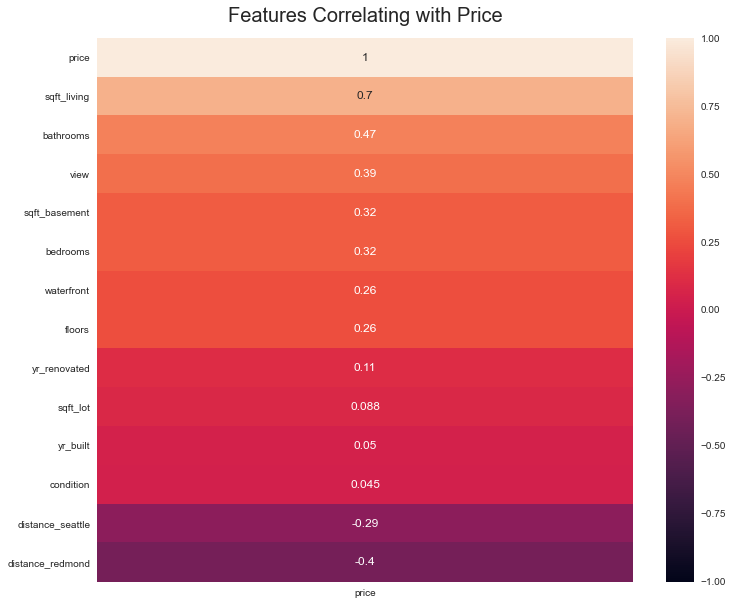

In [45]:
fig, ax = plt.subplots(figsize=(12, 10))
heatmap = sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':20}, pad=16);

In [46]:
# Drop some highly correlated columns
df.drop(['condition', 'yr_built', 'sqft_lot', 'yr_renovated'], axis=1, inplace=True)

## Model 5

In [47]:
X = df.drop('price', axis=1)
y = df['price']
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     4067.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:05:41   Log-Likelihood:            -2.3552e+05
No. Observations:               17263   AIC:                         4.711e+05
Df Residuals:                   17253   BIC:                         4.711e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.372e+05   7828.571     43.075      0.000    3.22e+05    3.53e+05
bedrooms         -4.135e+04   2200.786    -18.787      0.000   -4.57e+04    -3.7e+04
bathrooms        -1173.9730   2816.874     -0.417      0.677   -6695.333    4347.387
sqft_living        296.3577      3.049     97.197      0.000     290.381     302.334
floors           -8627.1409   3533.018     -2.442      0.015   -1.56e+04   -1702.068
waterfront         5.92e+05   2.05e+04     28.906      0.000    5.52e+05    6.32e+05
view              6.946e+04   2344.692     29.623      0.000    6.49e+04    7.41e+04
sqft_basement      -73.0223      4.748    -15.379      0.000     -82.329     -63.715
distance_seattle -1.445e+04    329.137    -43.901      0.000   -1.51e+04   -1.38e+04
distance_redmond -7040.3985    301.285    -23.368      0.000   -7630.948   -6449.849
==============================================================================
Omnibus:                    11250.054   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           363790.010
Skew:                           2.652   Prob(JB):                         0.00
Kurtosis:                      24.855   Cond. No.                     3.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# Drop insignificant values (P-value higher than 0.05)
# df.drop(['bathrooms'], axis=1, inplace=True)

In [49]:
# df.drop(['sqft_basement'], axis=1, inplace=True)

In [50]:
df.drop(['view'], axis=1, inplace=True)

In [51]:
# df.drop(['waterfront'], axis=1, inplace=True)

In [52]:
X = df.drop('price', axis=1)
y = df['price']
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     4250.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:05:41   Log-Likelihood:            -2.3595e+05
No. Observations:               17263   AIC:                         4.719e+05
Df Residuals:                   17254   BIC:                         4.720e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.337e+05   8024.013     41.583      0.000    3.18e+05    3.49e+05
bedrooms         -4.753e+04   2245.838    -21.162      0.000   -5.19e+04   -4.31e+04
bathrooms        -1907.2007   2887.425     -0.661      0.509   -7566.847    3752.445
sqft_living        313.8883      3.066    102.374      0.000     307.878     319.898
floors           -9501.5785   3621.518     -2.624      0.009   -1.66e+04   -2403.035
waterfront        8.117e+05   1.96e+04     41.483      0.000    7.73e+05     8.5e+05
sqft_basement      -57.0946      4.836    -11.806      0.000     -66.574     -47.615
distance_seattle -1.561e+04    334.995    -46.598      0.000   -1.63e+04    -1.5e+04
distance_redmond -5939.1904    306.483    -19.379      0.000   -6539.928   -5338.452
==============================================================================
Omnibus:                    10838.836   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           295068.697
Skew:                           2.568   Prob(JB):                         0.00
Kurtosis:                      22.592   Cond. No.                     2.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
import statsmodels.formula.api as smf

In [54]:
def model_diagnostic(model, x, x_name, y):
    
    residuals = model.resid
    
    f = plt.figure()
    f, axes = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(65,20), squeeze=False)
    
    f.text(s="Model Diagnostic Summary", x=.40, y=1.15, fontsize=65, fontname='silom')
    f.text(s="r-Squared: {r}".format(r=round(model.rsquared, 2)), x=.40, y=1.05, fontsize=50, fontname='serif')
    f.text(s="p-value: {p}".format(p= model.f_pvalue), x=.53, y=1.05, fontsize=50, fontname='serif')
    
    f.text(s='Residuals Histogram', x=.45, y=.93, fontsize=55, fontname='serif')
    
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[0][0])    
    plt.show;
    
    f.text(s='QQ Plot', x=.20, y=.93, fontsize=55, fontname='serif')
    
    axes[0][1].hist(residuals)
    plt.show;
    
    sns.residplot(x, y, ax=axes[0][2])
 
    f.text(s='Residuals vs {x}'.format(x=x_name), x=.73, y=.93, fontsize=55, fontname='serif')
    plt.tight_layout;
    plt.show;

<Figure size 576x396 with 0 Axes>

findfont: Font family ['silom'] not found. Falling back to DejaVu Sans.


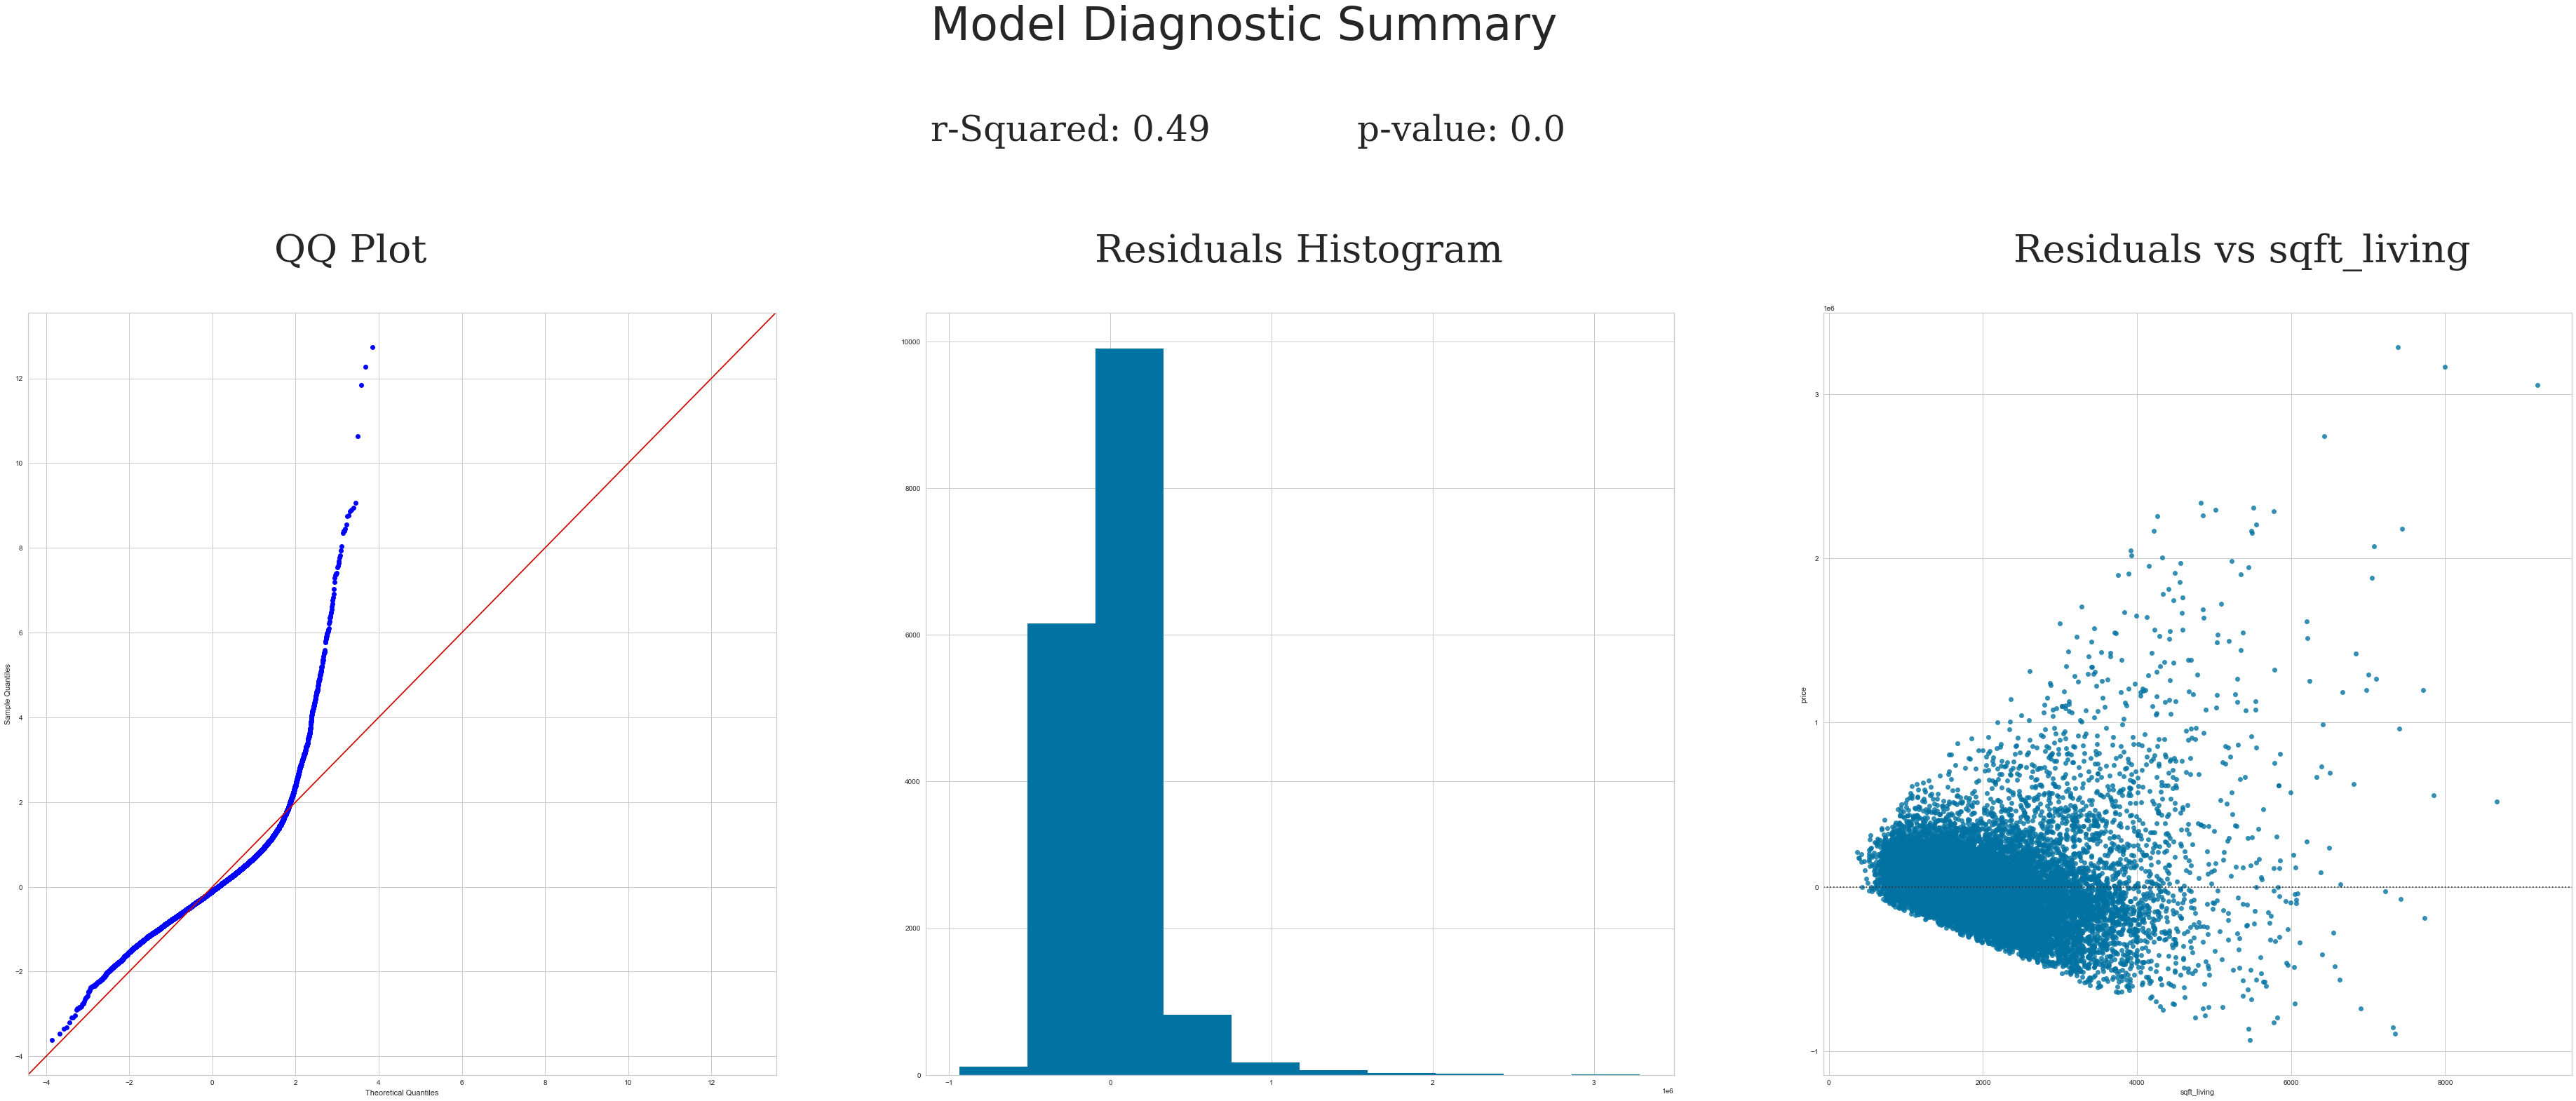

In [55]:
f = 'price~sqft_living'
sqft_living_model = smf.ols(formula=f, data=df).fit()
model_diagnostic(sqft_living_model, df['sqft_living'], 'sqft_living', df['price'])

<Figure size 576x396 with 0 Axes>

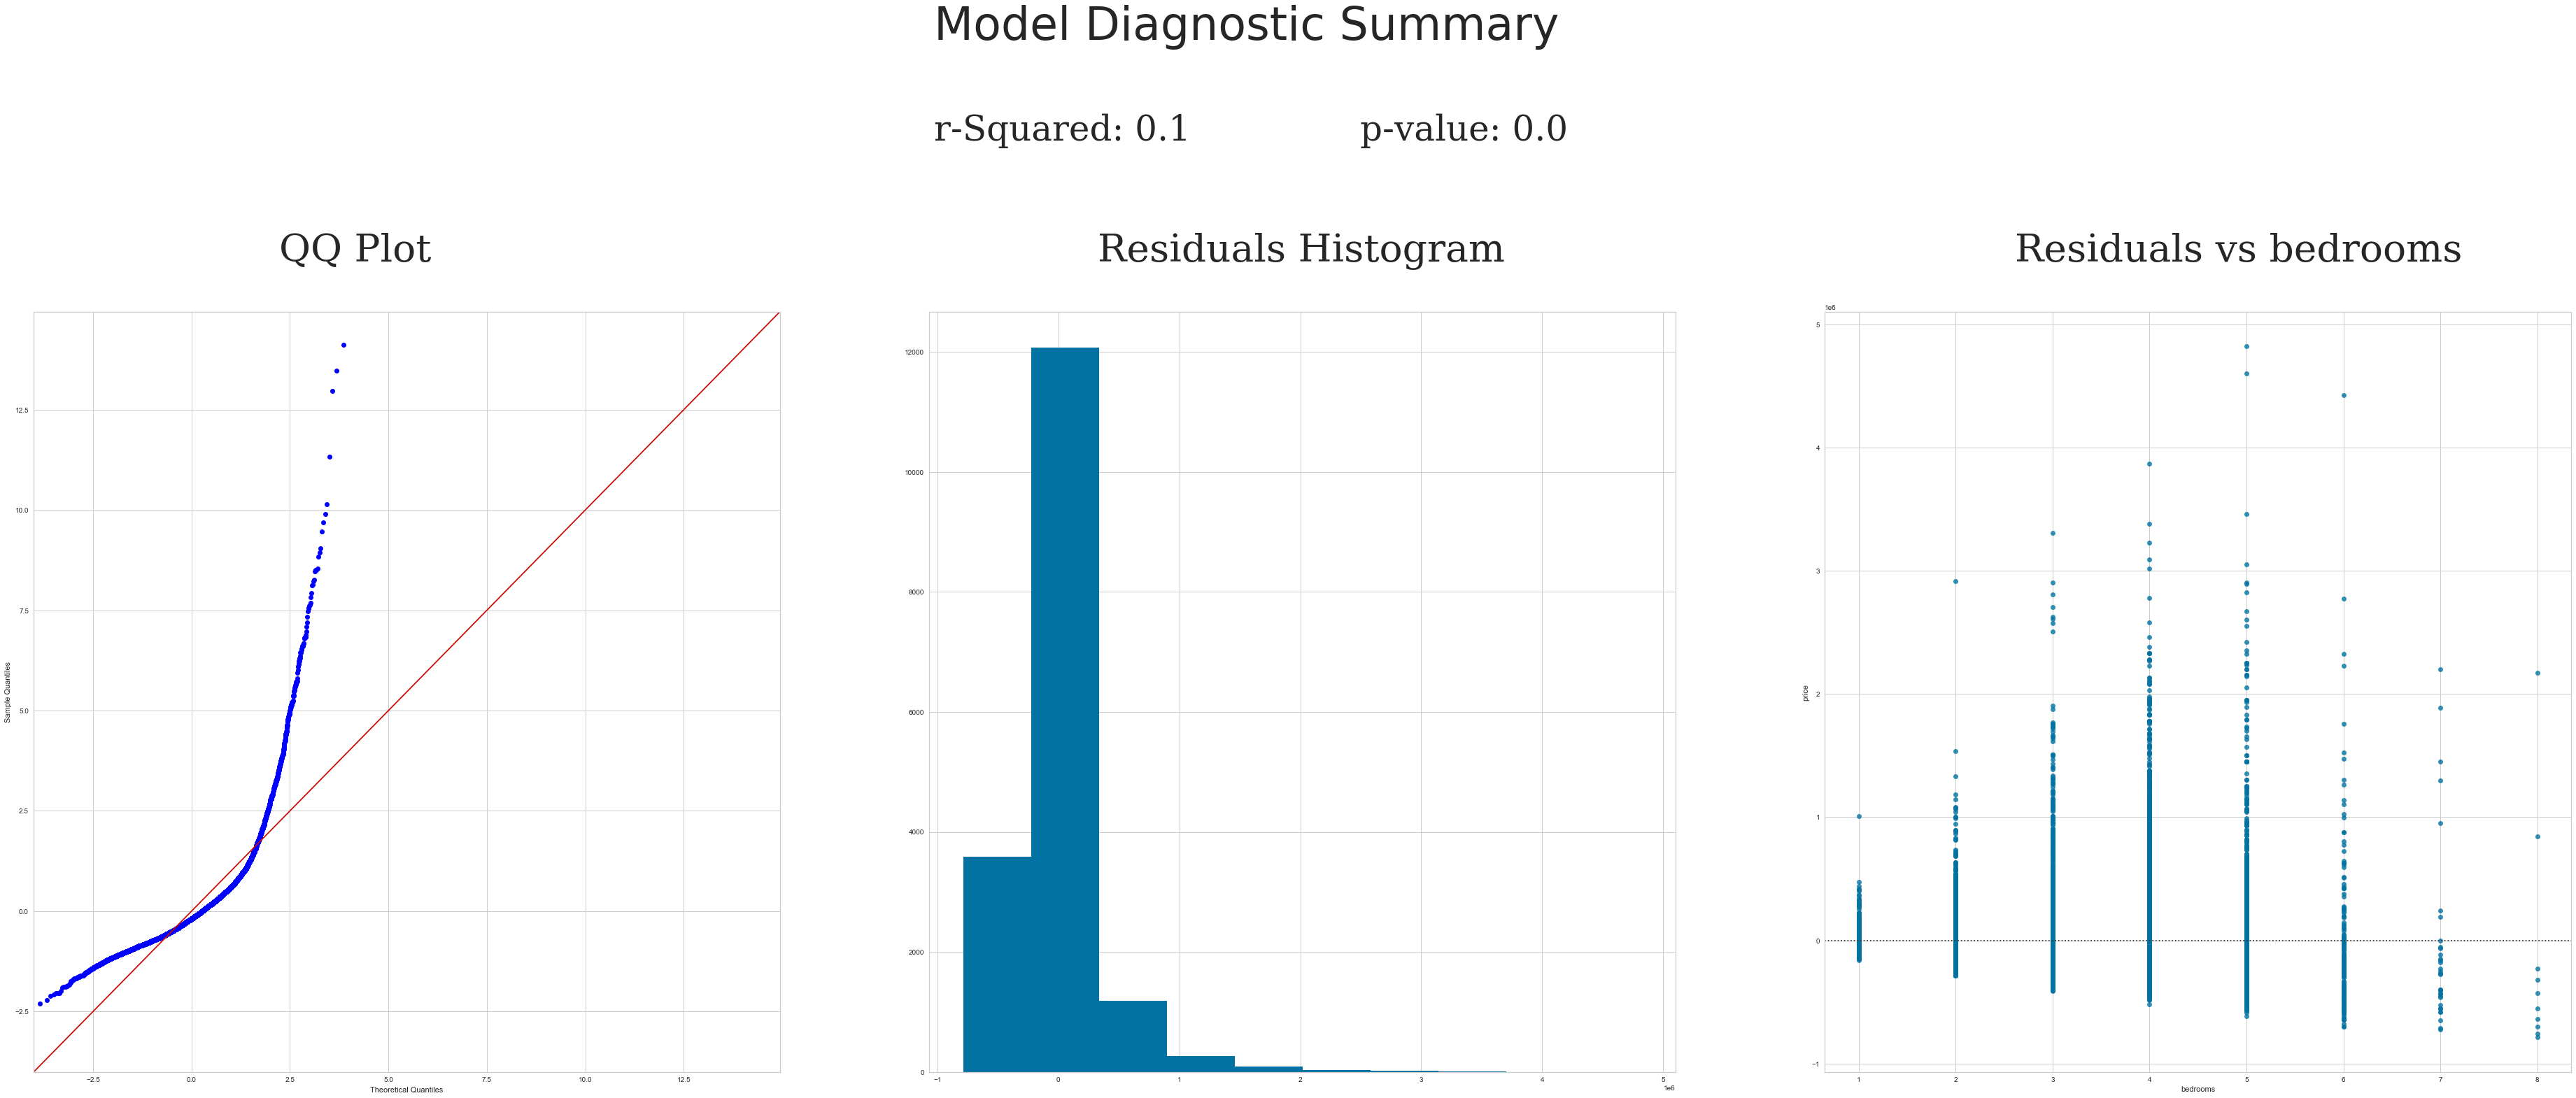

In [56]:
f = 'price~bedrooms'
bedrooms_model = smf.ols(formula=f, data=df).fit()
model_diagnostic(bedrooms_model, df['bedrooms'], 'bedrooms', df['price'])

<Figure size 576x396 with 0 Axes>

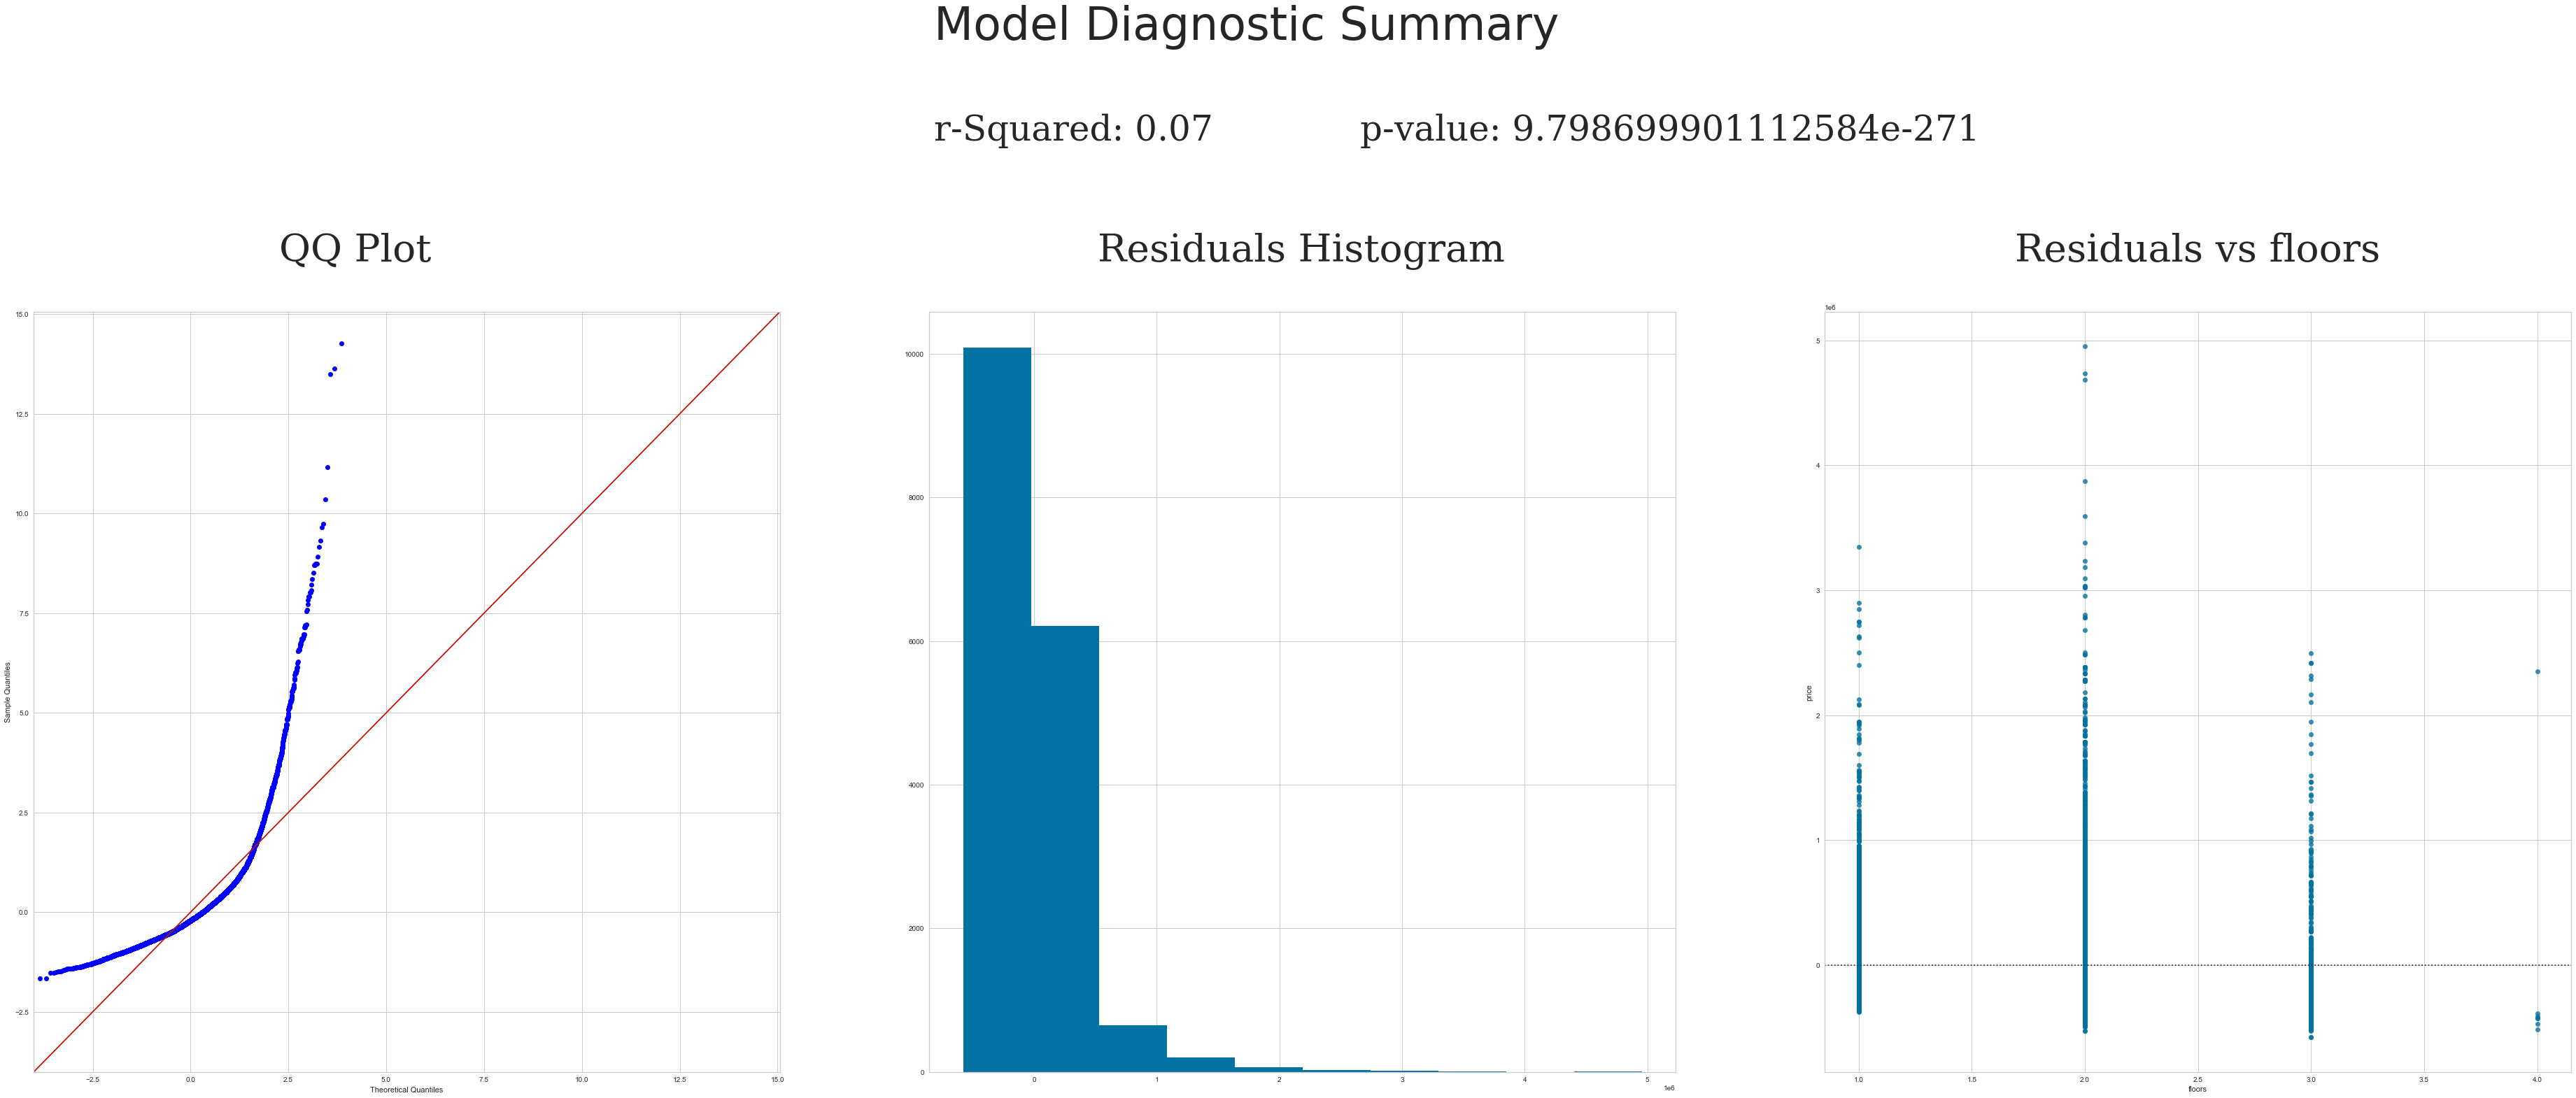

In [57]:
f = 'price~floors'
floors_model = smf.ols(formula=f, data=df).fit()
model_diagnostic(floors_model, df['floors'], 'floors', df['price'])

<Figure size 576x396 with 0 Axes>

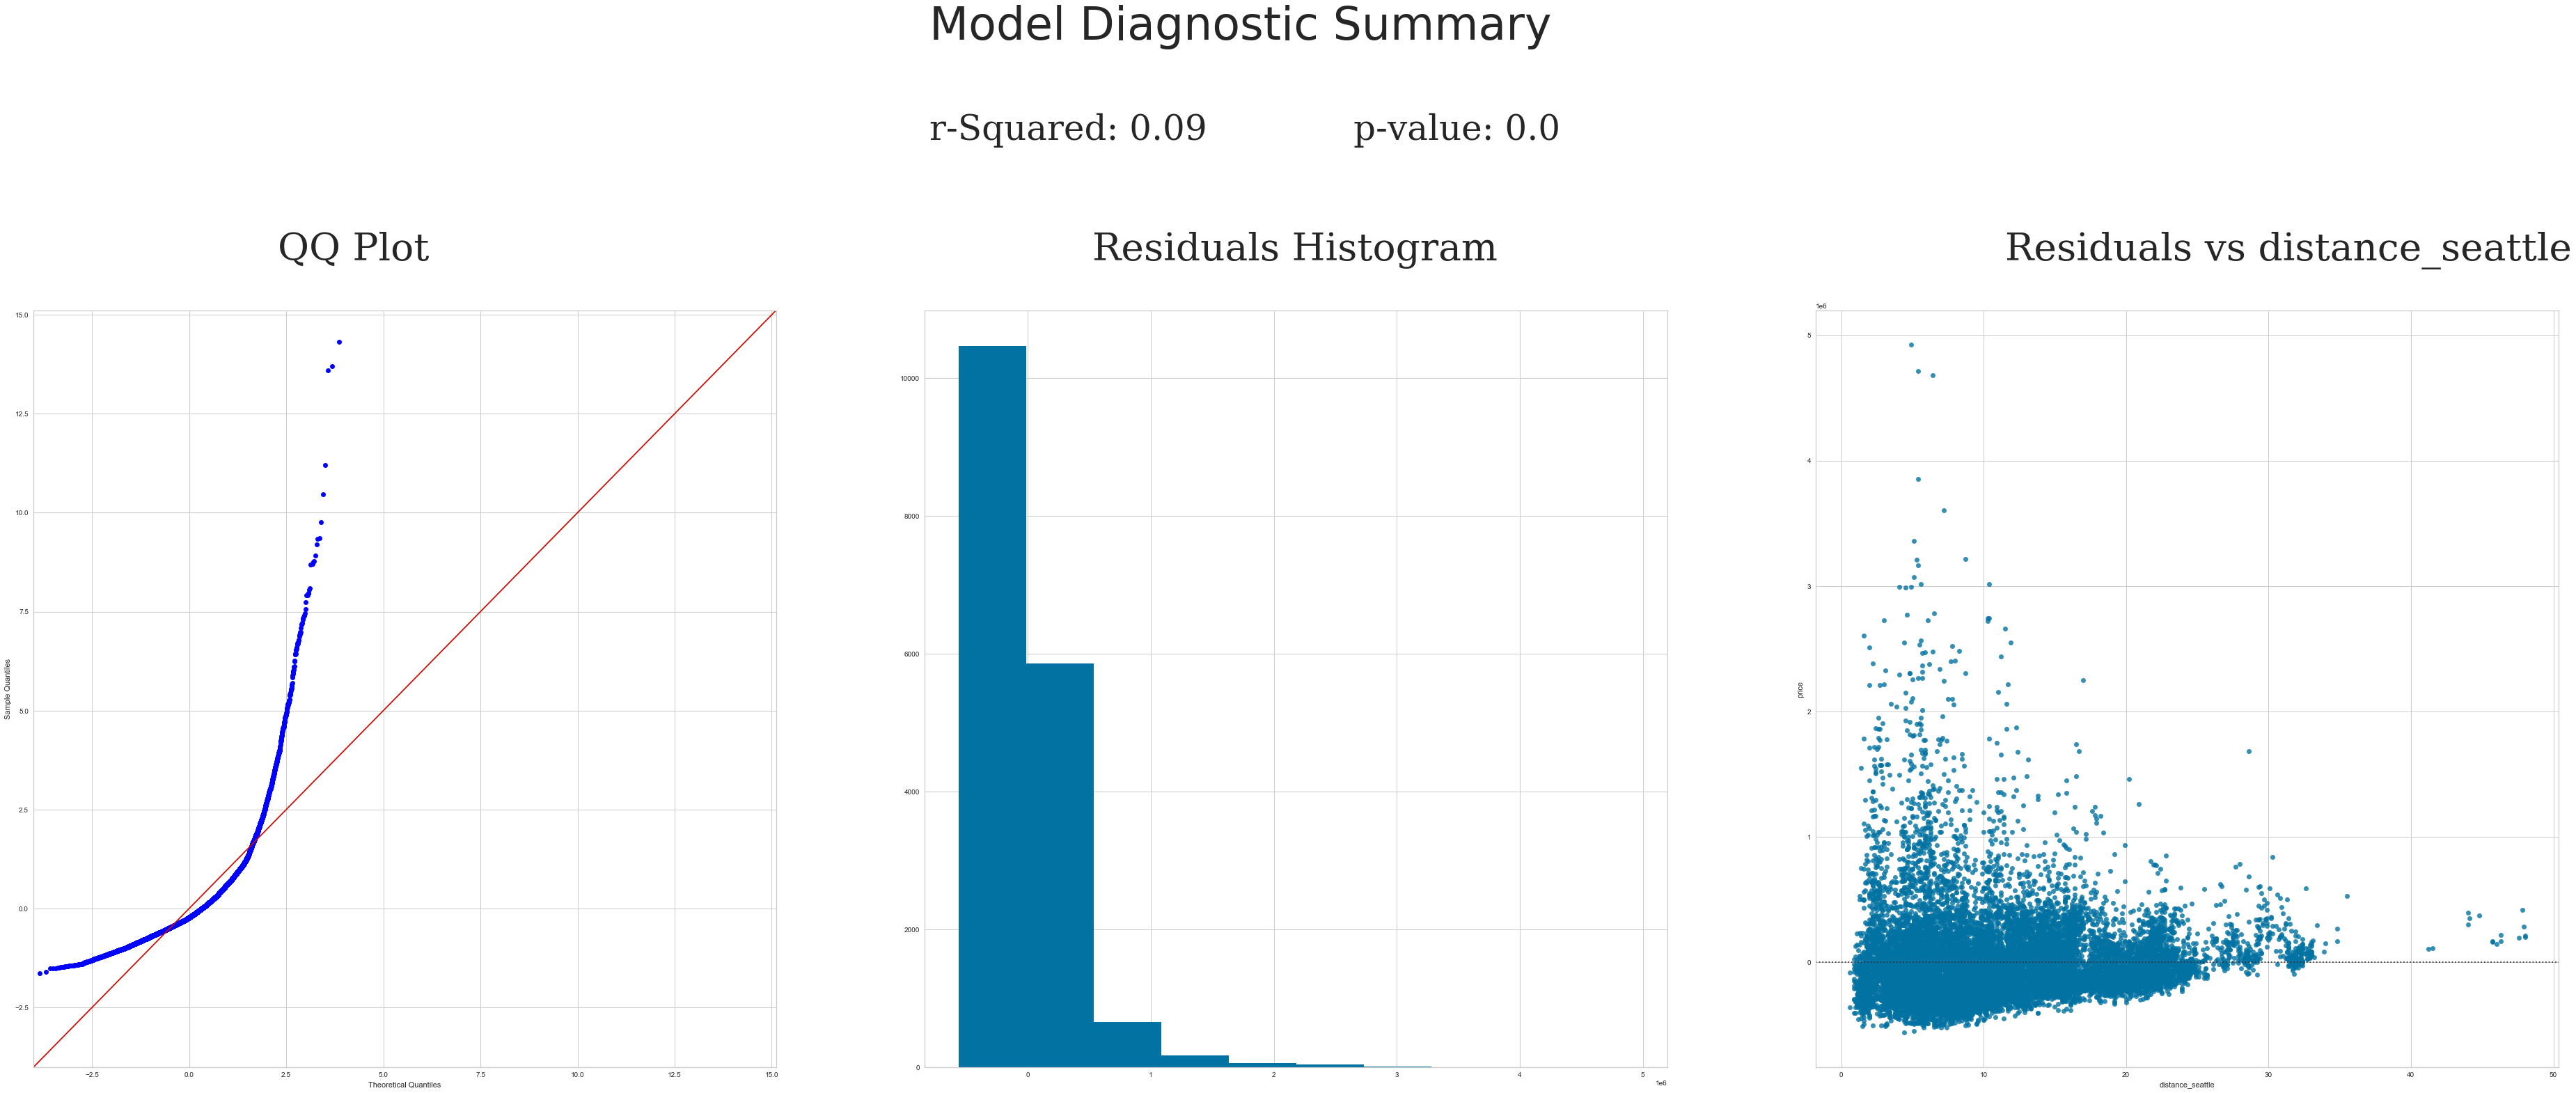

In [58]:
f = 'price~distance_seattle'
distance_seattle_model = smf.ols(formula=f, data=df).fit()
model_diagnostic(distance_seattle_model, df['distance_seattle'], 'distance_seattle', df['price'])

<Figure size 576x396 with 0 Axes>

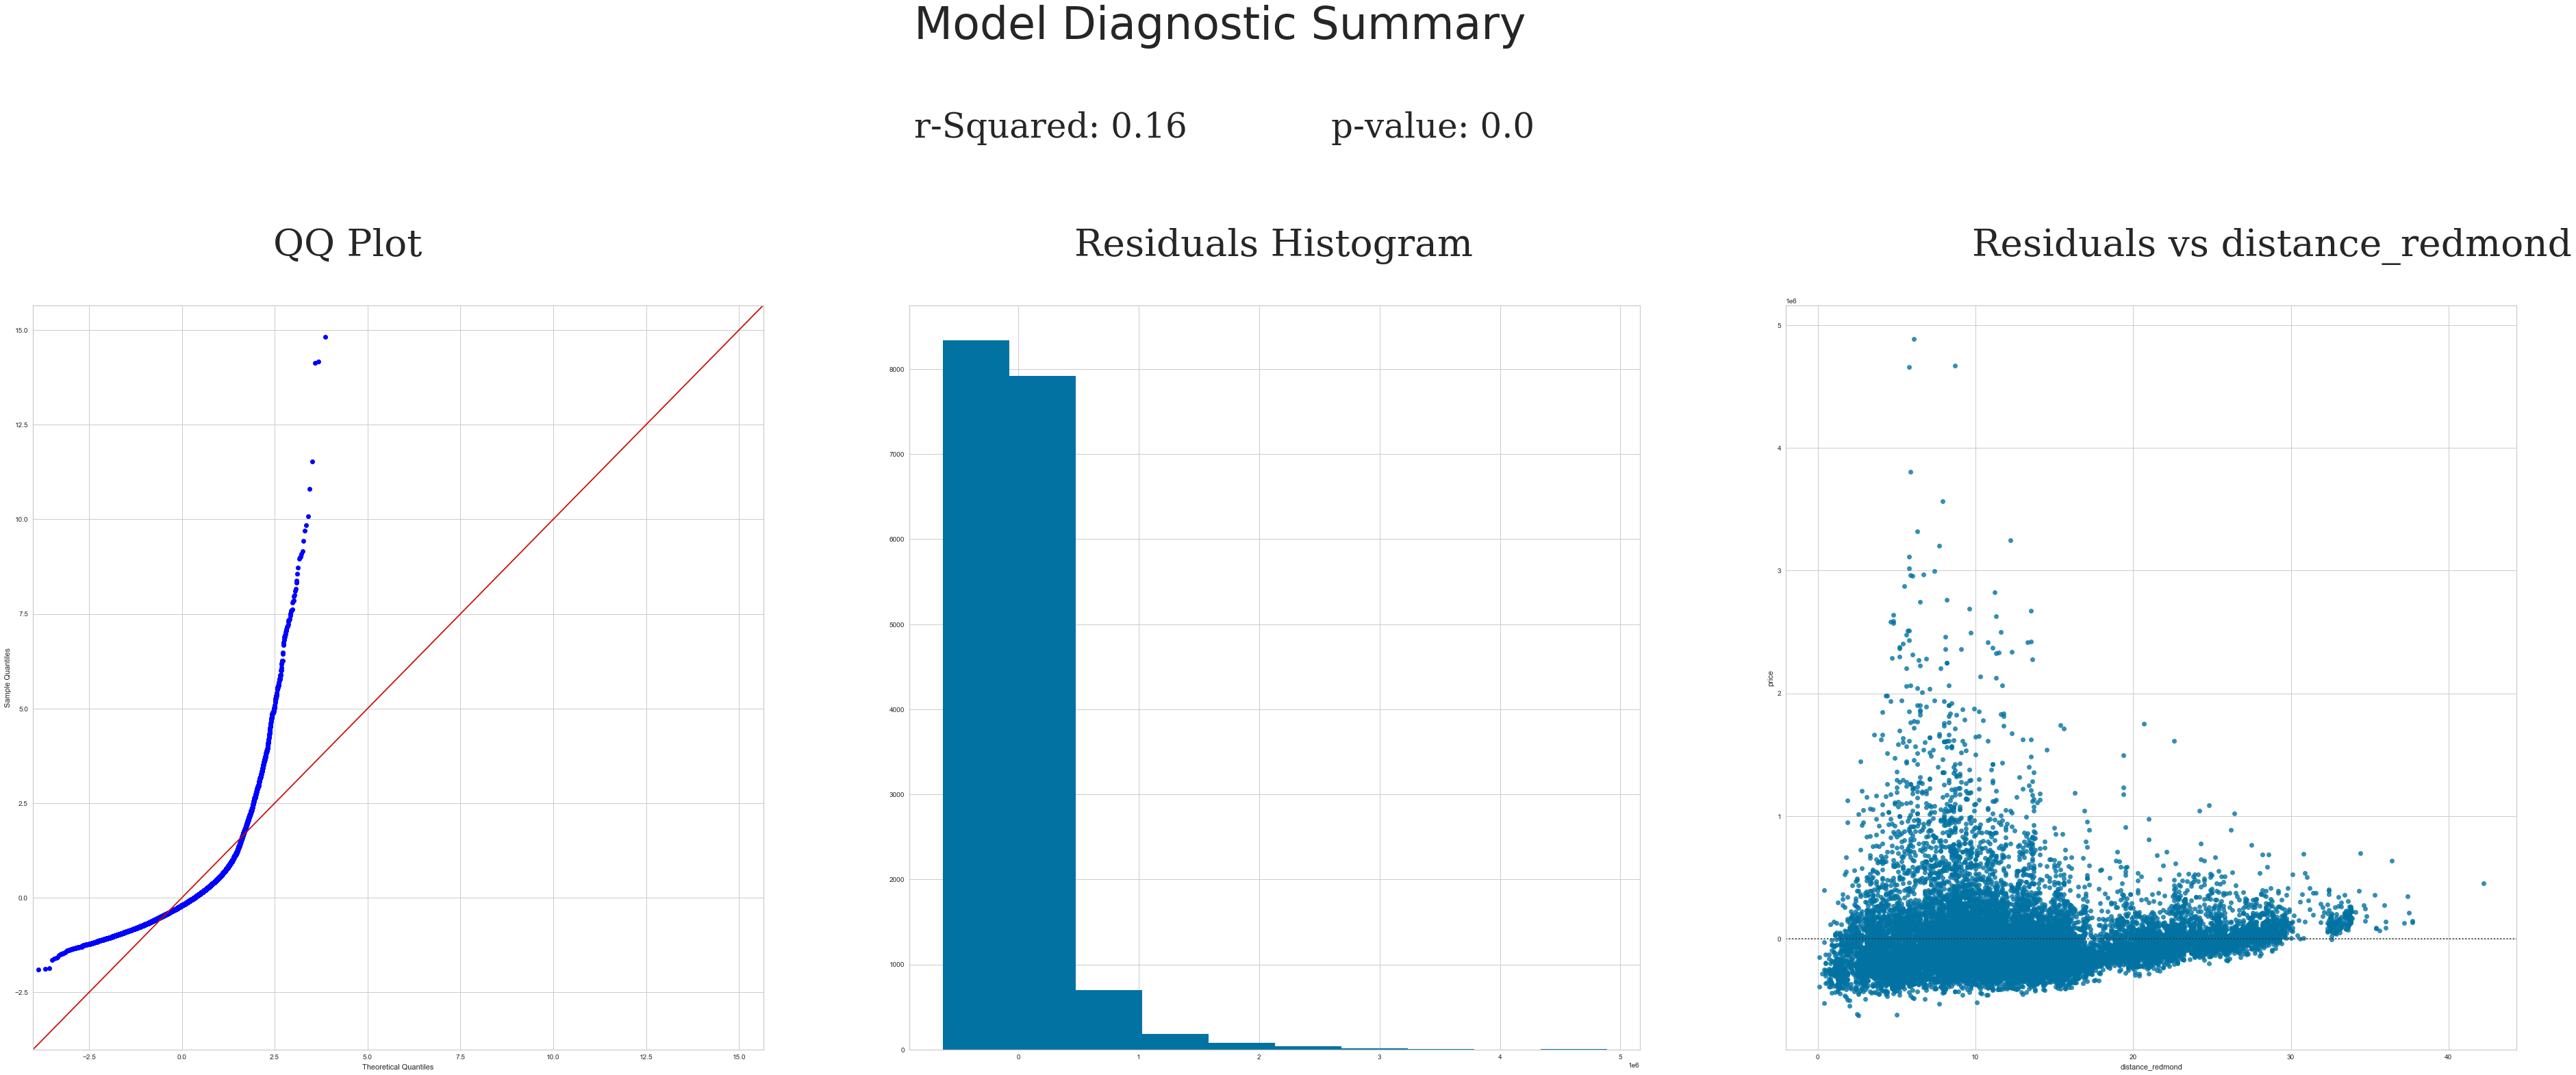

In [59]:
f = 'price~distance_redmond	'
distance_redmond_model = smf.ols(formula=f, data=df).fit()
model_diagnostic(distance_redmond_model, df['distance_redmond'], 'distance_redmond', df['price'])

In [60]:
# df['sqft_lot'].value_counts()

In [61]:
# df['sqft_lot'].hist()

data_log = pd.DataFrame([])
data_log['logsqft_living'] = np.log(df['sqft_living'])
logsqft_living = data_log['logsqft_living']
scaled_logdistance_seattle = (logdistance_seattle - np.mean(logdistance_seattle)) / np.sqrt(np.var(logdistance_seattle))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled['sqft_living'] = scaled_logsqft_living

data_cont_scaled.hist(figsize = [6, 6]);

In [62]:
# fig, ax = plt.subplots(figsize=(12, 12))
# sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True);

Our Durbin-Watson value is close to 2, which indicates de model is homoscedastic.

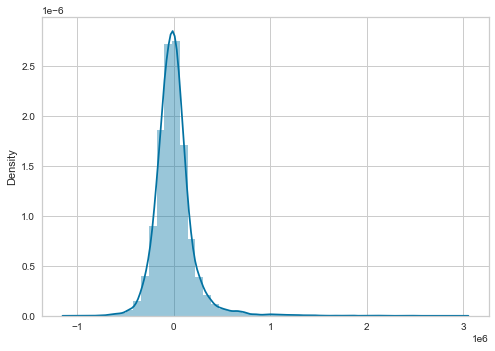

In [63]:
sns.distplot(model.resid);

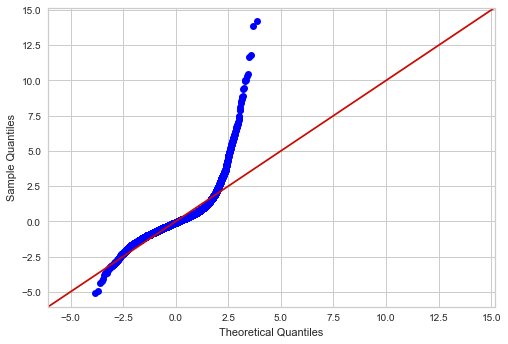

In [64]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

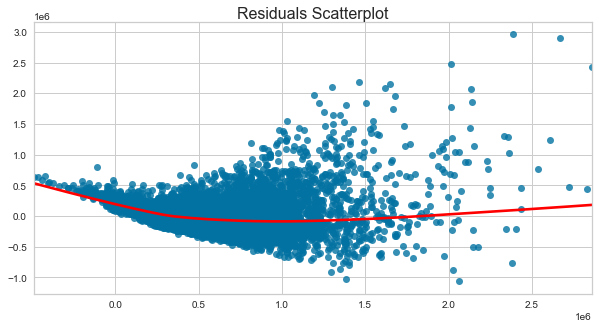

In [65]:
plt.figure(figsize=(10,5))
sns.regplot(x=model.predict(), y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99);

In [66]:
from statsmodels.stats.diagnostic import het_goldfeldquandt
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
list(zip(name, test))

[('F statistic', 0.9583855583130693), ('p-value', 0.9757707345435627)]

We fail to reject the null hypotesis here since the p-value is insignificant, so the model is homoscedastic.

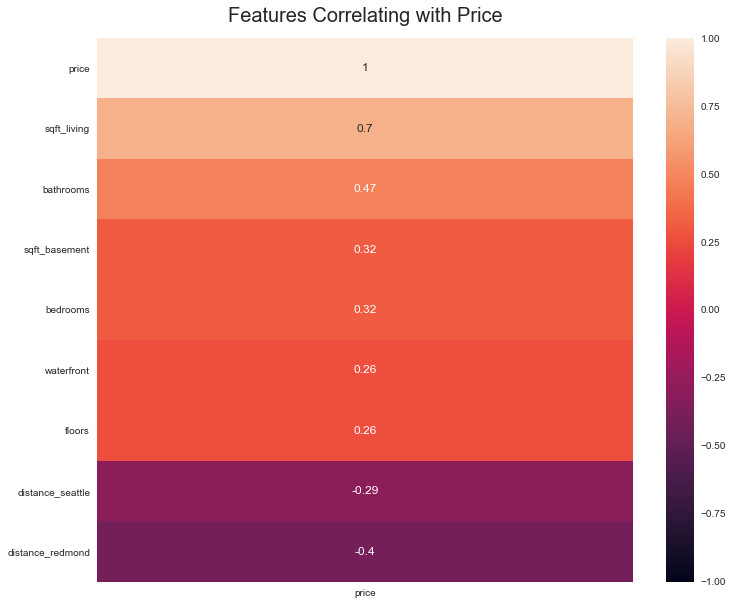

In [67]:
fig, ax = plt.subplots(figsize=(12, 10))
heatmap = sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':20}, pad=16);

## Checking Assumptions for Linear Regression

In [68]:
df['bedrooms'].value_counts()

3    7836
4    5542
2    2189
5    1279
6     213
1     161
7      33
8      10
Name: bedrooms, dtype: int64

In [69]:
df['sqft_basement'].value_counts()

0       10606
600       172
500       168
800       159
700       158
        ...  
374         1
1525        1
2580        1
2500        1
415         1
Name: sqft_basement, Length: 280, dtype: int64

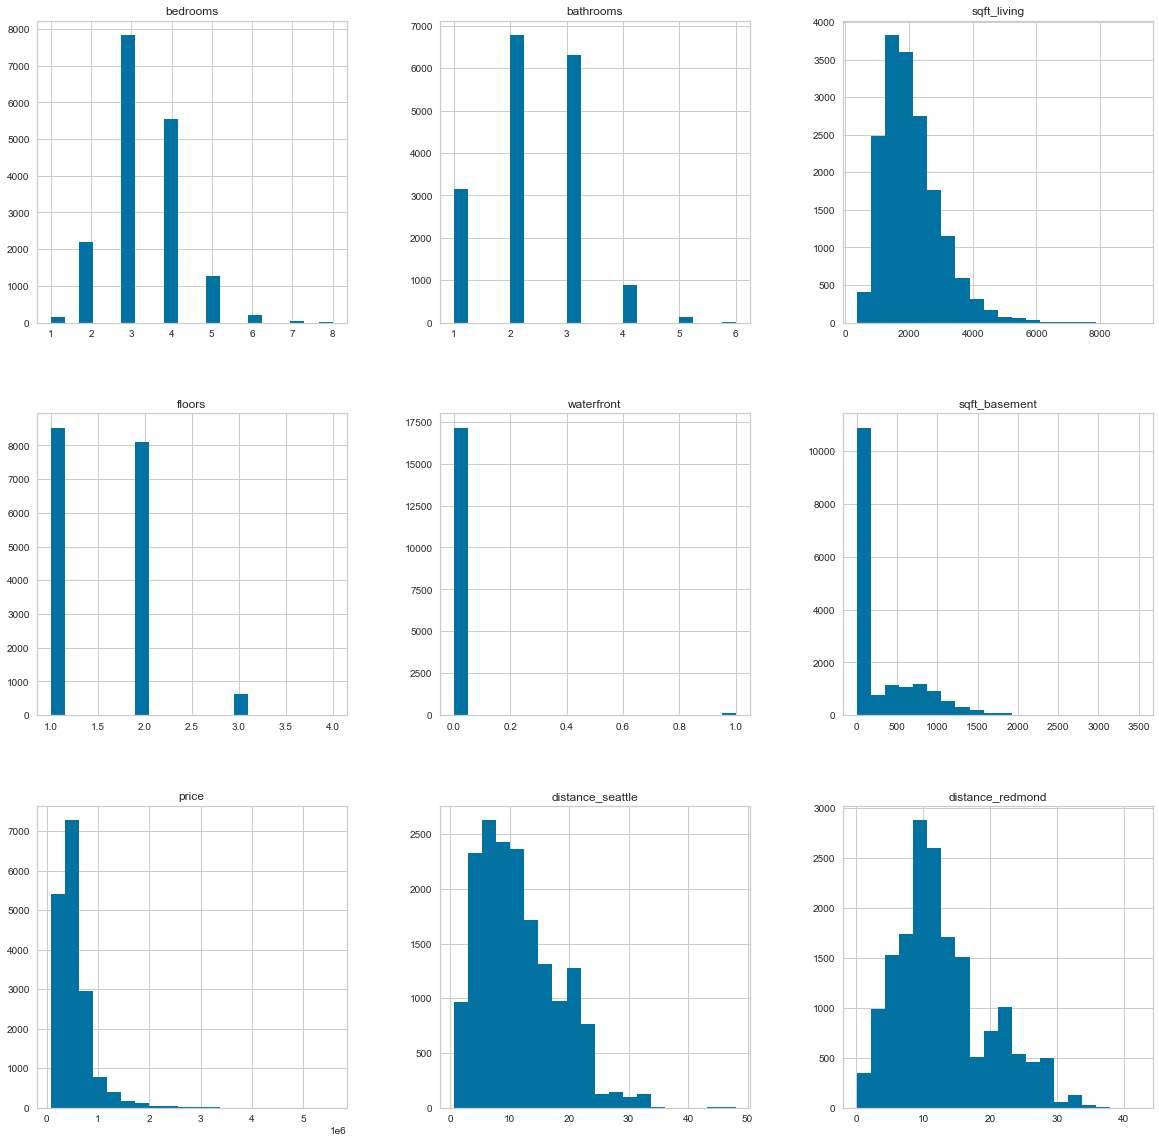

In [70]:
df.hist(figsize=(20,20), bins=20);

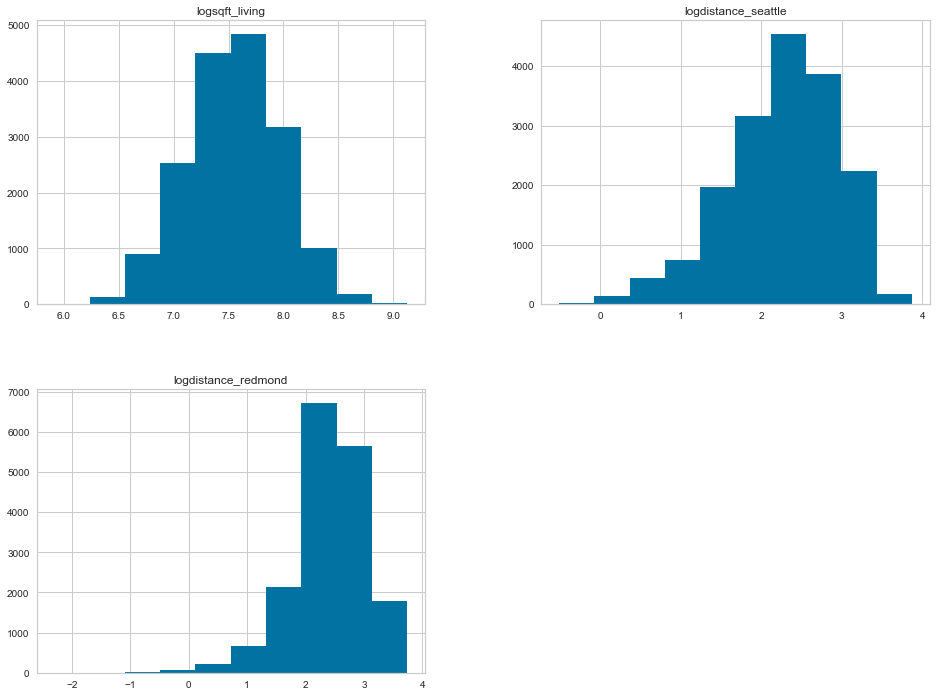

In [71]:
data_log = pd.DataFrame([])
data_log['logsqft_living'] = np.log(df['sqft_living'])
data_log['logdistance_seattle'] = np.log(df['distance_seattle'])
data_log['logdistance_redmond'] = np.log(df['distance_redmond'])
data_log.hist(figsize =[16, 12]);

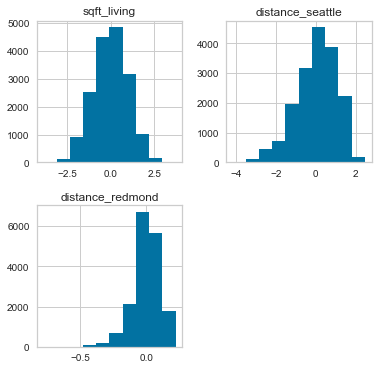

In [72]:

logsqft_living = data_log['logsqft_living']
logdistance_seattle = data_log['logdistance_seattle']
logdistance_redmond = data_log['logdistance_redmond']


scaled_logsqft_living = (logsqft_living - np.mean(logsqft_living)) / np.sqrt(np.var(logsqft_living))
scaled_logdistance_seattle = (logdistance_seattle - np.mean(logdistance_seattle)) / np.sqrt(np.var(logdistance_seattle))
scaled_logdistance_redmond = (logdistance_redmond - np.mean(logdistance_redmond)) / (max(logdistance_redmond) - min(logdistance_redmond))

data_cont_scaled = pd.DataFrame([])

data_cont_scaled['sqft_living'] = scaled_logsqft_living
data_cont_scaled['distance_seattle'] = scaled_logdistance_seattle
data_cont_scaled['distance_redmond'] = scaled_logdistance_redmond

data_cont_scaled.hist(figsize = [6, 6]);

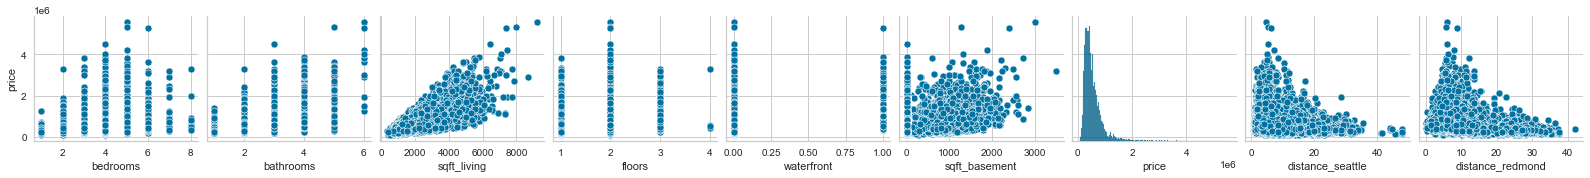

In [73]:
sns.pairplot(df, y_vars=['price'])

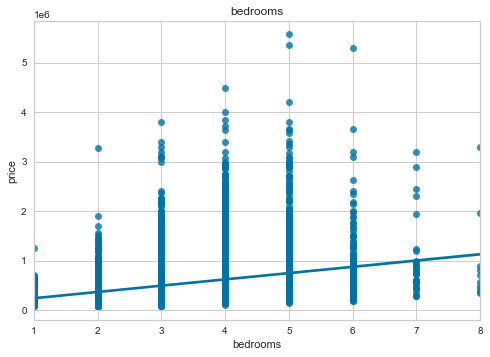

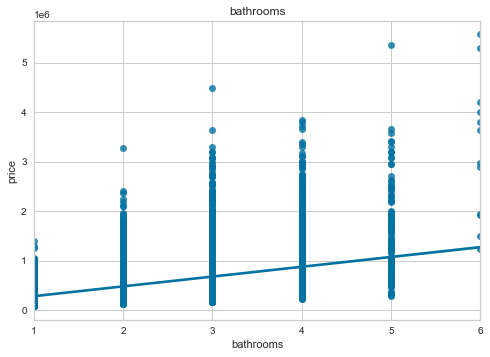

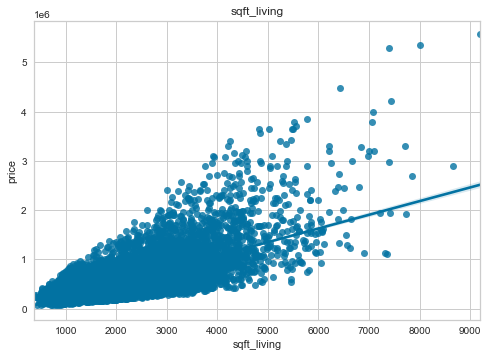

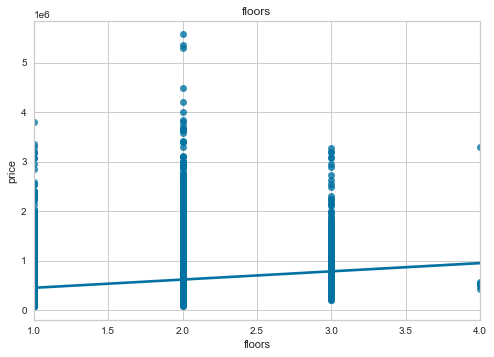

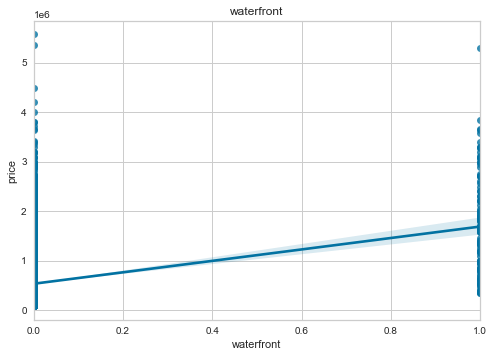

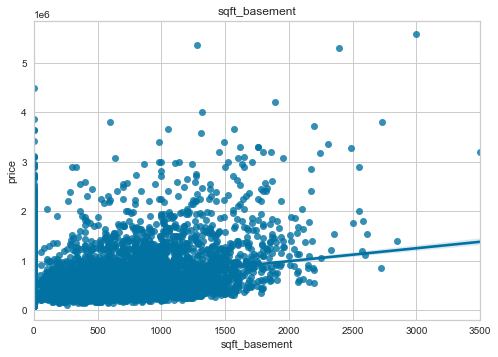

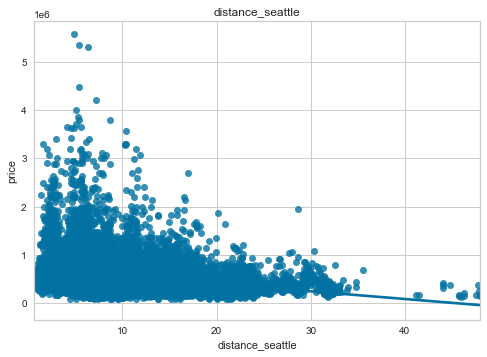

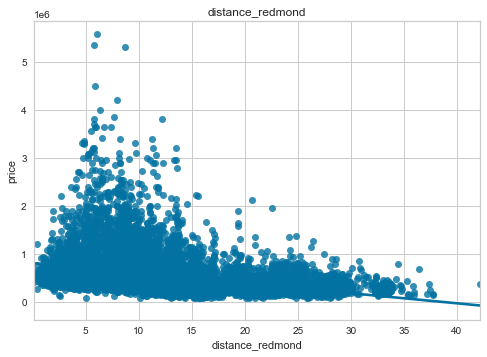

In [74]:
# X = df.drop('price', axis=1)
for col in X.columns:
    plt.subplots(1, 1)
    sns.regplot(X[col], df.price)
    plt.title(col)